#### 3. Import the required packages with their customary aliasesImport the required packages with their customary aliases and

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### 4.Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
%matplotlib inline

#### 5.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv(r"C:\Users\cheri\Documents\NSS_Data_Analytics\Projects\gdp-and-internet-usage-Chericehere\Data\gdp_percapita.csv", nrows=6606
                )


In [4]:
print(gdp_df.head(6))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  2190.240321              NaN
1     Afghanistan  2017  2202.570851              NaN
2     Afghanistan  2016  2200.764487              NaN
3     Afghanistan  2015  2212.750899              NaN
4     Afghanistan  2014  2249.253738              NaN
5     Afghanistan  2013  2264.317575              NaN


#### 6.Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv(r"C:\Users\cheri\Documents\NSS_Data_Analytics\Projects\gdp-and-internet-usage-Chericehere\Data\internet_use.csv", nrows=4495)

print(internet_df.head(6))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


#### 7. Look at the shape of each DataFrame - how many rows? How many columns?



In [6]:
gdp_df.shape

(6606, 4)

In [7]:
internet_df.shape

(4495, 4)

#### 8.Take a look at the datatypes for the columns in each DataFrame.

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
internet_df.dtypes 

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

#### 9.Take a look at the last 10 rows of each DataFrame in turn.

In [10]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6596,Zimbabwe,1999,3600.849291,NaN
6597,Zimbabwe,1998,3653.920016,NaN
6598,Zimbabwe,1997,3580.048793,NaN
6599,Zimbabwe,1996,3520.430146,NaN
6600,Zimbabwe,1995,3226.413930,NaN
6601,Zimbabwe,1994,3263.934978,NaN
6602,Zimbabwe,1993,3033.504852,NaN
6603,Zimbabwe,1992,3054.889178,NaN
6604,Zimbabwe,1991,3426.598094,NaN
6605,Zimbabwe,1990,3324.348171,NaN


In [11]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


##### 10.Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [12]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
gdp_df.head(10)

,Country or Area,Year,Value
0,Afghanistan,2018,2190.240321
1,Afghanistan,2017,2202.570851
2,Afghanistan,2016,2200.764487
3,Afghanistan,2015,2212.750899
4,Afghanistan,2014,2249.253738
5,Afghanistan,2013,2264.317575
6,Afghanistan,2012,2220.481526
7,Afghanistan,2011,2037.608607
8,Afghanistan,2010,2093.743565
9,Afghanistan,2009,1881.777626


In [13]:
internet_df = internet_df.drop(columns=['Value Footnotes'])
internet_df.head(10)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


#### 11.Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [14]:
gdp_df = gdp_df.rename(columns={'Country or Area' : 'Country','Value' : 'GDP_Per_Capita'})
print(gdp_df)


          Country  Year  GDP_Per_Capita
0     Afghanistan  2018     2190.240321
1     Afghanistan  2017     2202.570851
2     Afghanistan  2016     2200.764487
3     Afghanistan  2015     2212.750899
4     Afghanistan  2014     2249.253738
...           ...   ...             ...
6601     Zimbabwe  1994     3263.934978
6602     Zimbabwe  1993     3033.504852
6603     Zimbabwe  1992     3054.889178
6604     Zimbabwe  1991     3426.598094
6605     Zimbabwe  1990     3324.348171

[6606 rows x 3 columns]


#### 12.Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [15]:
internet_df = internet_df.rename(columns={'Country or Area' : 'Country','Value' : 'Internet_Users_Pct'})
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


### Merge

In [16]:
internet_df["Year"] = internet_df.Year.astype('int64')
#gdp_and_internet_use=gdp_df.merge(internet_df, on=['Country','Year'], how='outer')
#gdp_and_internet_use


In [17]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, how = 'outer')
gdp_and_internet_use.shape

(7664, 4)

#### 14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [18]:
print(gdp_and_internet_use.head())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2018     2190.240321                 NaN
1  Afghanistan  2017     2202.570851                 NaN
2  Afghanistan  2016     2200.764487                 NaN
3  Afghanistan  2015     2212.750899                 NaN
4  Afghanistan  2014     2249.253738                6.39


#### 15.Look at the last five rows to make sure the data is clean and as expected.

In [19]:
print(gdp_and_internet_use.tail())

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
7659   Yemen  1999             NaN            0.056629
7660   Yemen  1998             NaN            0.023323
7661   Yemen  1997             NaN            0.015025
7662   Yemen  1996             NaN            0.000621
7663   Yemen  1990             NaN            0.000000


#### 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [20]:
#select_years = gdp_and_internet_use[(gdp_and_internet_use.Year == '2004') | (gdp_and_internet_use.Year == '2009') | (gdp_and_internet_use.Year == '2019')]

#print(select_years.head())

Years = 2004, 2009, 2014
gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use.Year.isin(Years)]


In [21]:
gdp_and_internet_use.Year.value_counts()

2014    277
2009    277
2004    276
Name: Year, dtype: int64

#### 17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [22]:
gdp_int_04 = gdp_and_internet_use[gdp_and_internet_use.Year == 2004]

gdp_int_09 = gdp_and_internet_use[gdp_and_internet_use.Year == 2009]

gdp_int_14 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]


In [23]:
gdp_int_14.Year.value_counts()

2014    277
Name: Year, dtype: int64

#### 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [24]:
column = gdp_int_14["Internet_Users_Pct"]
max_internet_2014 = column.max()
print(max_internet_2014)

98.16


In [25]:
gdp_int_14.loc[gdp_int_14['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2014
GDP_Per_Capita        49911.1
Internet_Users_Pct      98.16
Name: 2507, dtype: object

#### 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [26]:
gdp_int_14.loc[gdp_int_14['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6838, dtype: object

#### 20.Repeat for 2004 and 2009.

In [27]:
gdp_int_04.loc[gdp_int_04['Internet_Users_Pct'].idxmax()]


Country                Sweden
Year                     2004
GDP_Per_Capita        45029.8
Internet_Users_Pct      83.89
Name: 5785, dtype: object

In [28]:
gdp_int_04.loc[gdp_int_04['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6847, dtype: object

#### 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [29]:
gdp_int_14.loc[gdp_int_14['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  156514
Internet_Users_Pct                 NaN
Name: 3564, dtype: object

#### 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [30]:
gdp_int_14.loc[gdp_int_14['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                          822.61
Internet_Users_Pct                         NaN
Name: 983, dtype: object

#### 23.Create some scatterplots: 
#### a. 2004 Percent Using the Internet vs GDP Per Capital

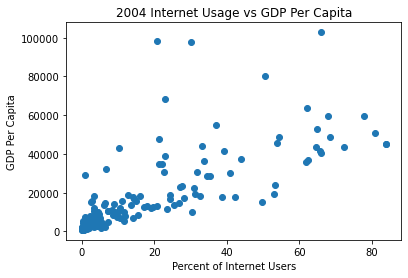

In [31]:
plt.scatter(gdp_int_04.Internet_Users_Pct, gdp_int_04.GDP_Per_Capita)

plt.xlabel('Percent of Internet Users')

plt.ylabel('GDP Per Capita')

plt.title('2004 Internet Usage vs GDP Per Capita')

plt.show()



#### b. 2009 Percent Using the Internet vs GDP Per Capita

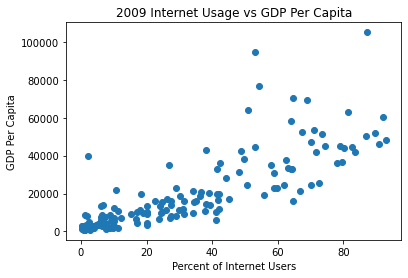

In [32]:
plt.scatter(gdp_int_09.Internet_Users_Pct, gdp_int_09.GDP_Per_Capita)

plt.xlabel('Percent of Internet Users')

plt.ylabel('GDP Per Capita')

plt.title('2009 Internet Usage vs GDP Per Capita')

plt.show()


#### c. 2014 Percent Using the Internet vs GDP Per Capita

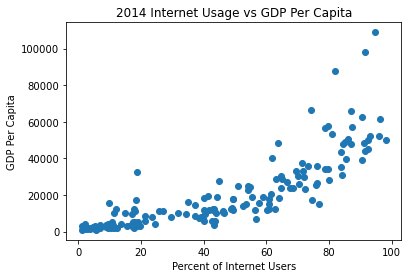

In [33]:
plt.scatter(gdp_int_14.Internet_Users_Pct, gdp_int_14.GDP_Per_Capita)

plt.xlabel('Percent of Internet Users')

plt.ylabel('GDP Per Capita')

plt.title('2014 Internet Usage vs GDP Per Capita')

plt.show()


#### 24.Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Countries with higher GDP per capital have higher internet use.

#### 25.Look at the distribution of gdp per capita values for 2014. Is it unimodal?

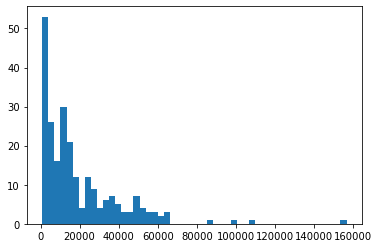

In [40]:
_=plt.hist(gdp_int_14.GDP_Per_Capita, bins = 50)


GDP per capita for 2014 is unimodal

#### 26.Look at the distribution of Internet Use for 2014. Is it unimodal?

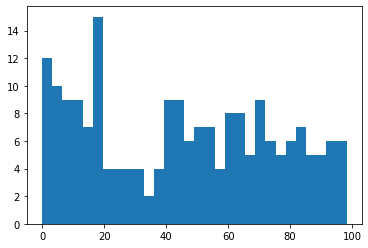

In [42]:
_ = plt.hist(gdp_int_14.Internet_Users_Pct, bins = 30 )

The distribution for Internet Use for 2014 is not unimodal.

#### 27. What are the top 5 countries in terms of internet use in 2014?

In [58]:
top_5_int_2014 = gdp_int_14.sort_values(by =['Internet_Users_Pct'], ascending = [False]).head(5)
top_5_int_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2507,Iceland,2014,49911.069825,98.16
6649,Bermuda,2014,NaN,96.80
4461,Norway,2014,61308.763730,96.30
1374,Denmark,2014,52172.606425,95.99
6609,Andorra,2014,NaN,95.90


#### 28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [59]:
top_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(top_5_int_2014.Country)]

In [60]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1374,Denmark,2014,52172.606425,95.990000
1379,Denmark,2009,50233.702688,86.840000
1384,Denmark,2004,50566.988088,80.930000
2507,Iceland,2014,49911.069825,98.160000
2512,Iceland,2009,48428.312438,93.000000
2517,Iceland,2004,45380.965464,83.880000
4461,Norway,2014,61308.763730,96.300000
4466,Norway,2009,60620.334503,92.080000
4471,Norway,2004,59647.501415,77.690000
6609,Andorra,2014,NaN,95.900000


#### 29.Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

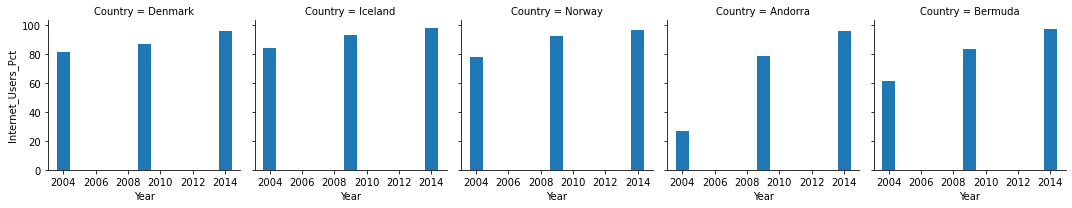

In [69]:
g = sns.FacetGrid(top_5_internet, col = "Country")
_ = g.map(plt.bar, "Year", "Internet_Users_Pct")


#### 30.Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?